# Outlier detection 

# 1)    Histogram & Quantile method

In [1]:
import numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pandas import read_csv

In [13]:
df=read_csv("C:/Users/PRAKASH MISHRA/Downloads/demo1.csv")

In [14]:
df

,Values
0,5
1,5
2,5
3,50
4,50
5,50
6,50
7,50
8,50
9,50


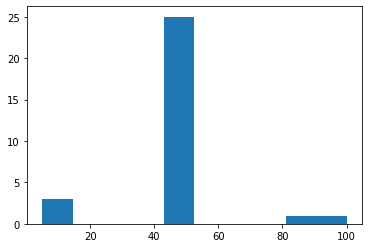

In [16]:
plt.hist(df.Values)
plt.show()

In [17]:
lower_bound=0.1
upper_bound=0.95
res=df.Values.quantile([lower_bound,upper_bound])
res

0.10    45.50
0.95    71.45
Name: Values, dtype: float64

Case 1-

Is 45.50< 5 and is 5<71.45??----False

Case 2-

Is 45.50< 50 and is 50<71.45??---True

In [19]:
true_index= (res.loc[lower_bound] < df.Values.values) & \
            (df.Values.values < res.loc[upper_bound])
true_index

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False])

In [20]:
df.Values[true_index]

3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
11    50
12    50
13    50
14    50
15    50
16    50
17    50
18    50
19    50
20    50
21    50
22    50
23    50
24    50
25    50
26    50
27    50
Name: Values, dtype: int64

In [22]:
mid=numpy.median(df.Values[true_index])
mid

50.0

In [25]:
false_index=~true_index
false_index

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True])

In [26]:
df[false_index]=mid
mid

50.0

In [27]:
df

,Values
0,50.0
1,50.0
2,50.0
3,50.0
4,50.0
5,50.0
6,50.0
7,50.0
8,50.0
9,50.0


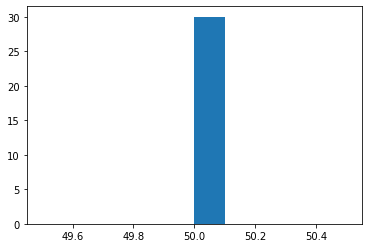

In [28]:
plt.hist(df.Values)
plt.show()

# 2)  Box & Whisker Plot

In [29]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [33]:
boston = pd.DataFrame(boston.data)
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


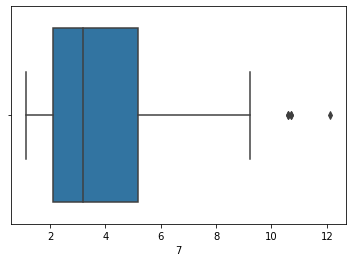

In [34]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=boston[7])

# 3)   Scatter plot

In [35]:
boston_c=boston

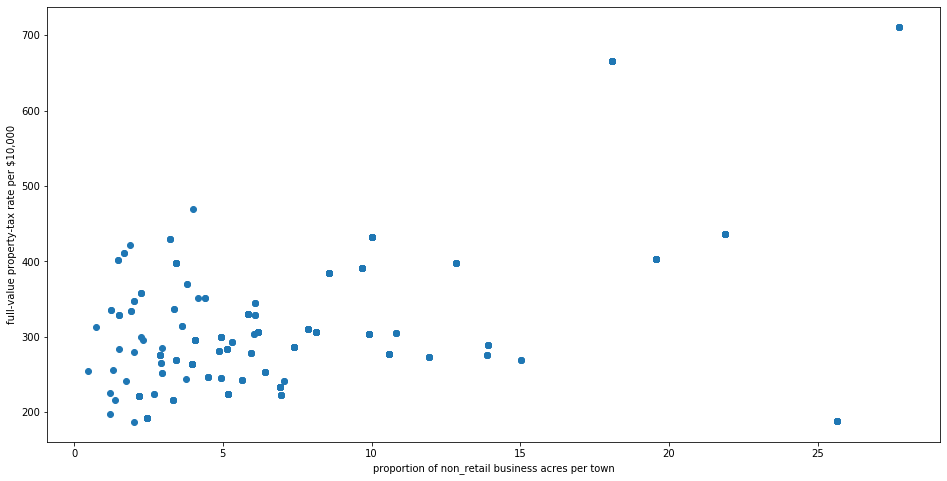

In [39]:
fig, ax= plt.subplots(figsize=(16,8))
ax.scatter(boston_c[2], boston_c[9])
ax.set_xlabel("proportion of non_retail business acres per town")
ax.set_ylabel("full-value property-tax rate per $10,000")
plt.show()

# 4)   Z-Score Method

In [41]:
from scipy import stats
zscore= numpy.abs(stats.zscore(boston_c))
print(zscore)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [42]:
threshold= 3
print(numpy.where(zscore >3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int32), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [43]:
print(zscore[102][11])

3.134425327914092


# 5)  IQR Method

In [44]:
boston_iqr = boston
Q1= boston_iqr.quantile(0.25)
Q3= boston_iqr.quantile(0.75)
IQR=Q3-Q1
print(IQR)

0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64


In [49]:
print((boston_iqr < (Q1- 1.5*IQR)) | (boston_iqr > (Q3+ 1.5*IQR)))

         0      1      2      3      4      5      6      7      8      9  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

        10     11     12  
0    False  False  False  
1    False  False  Fa

# 6) Outlier Removal by Z-score method

In [50]:
boston_clean= boston
boston_clean= boston_clean[(zscore <3).all(axis=1)]

In [51]:
boston.shape

(506, 13)

In [52]:
boston_clean.shape

(415, 13)

# 6(b) Outlier Removal by IQR Method

In [54]:
boston_iqr_clean=boston_iqr[~((boston_iqr < (Q1- 1.5*IQR)) | (boston_iqr > (Q3+ 1.5*IQR))).any(axis=1)]


In [55]:
boston_iqr_clean

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#  Outlier Treatment 

# A)  Log Transformation for Positive Or Right Skewed Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data=[1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,2,1,1,1,1,1,1]
df=pd.DataFrame(data,columns=['Positive skewed'])
df

,Positive skewed
0,1
1,1
2,10
3,10
4,15
5,15
6,20
7,20
8,30
9,50


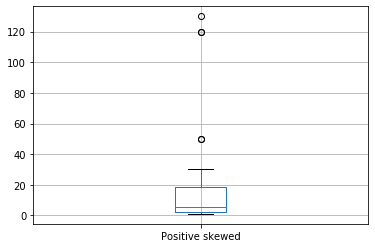

In [5]:
import matplotlib.pyplot as plt
df.boxplot(column='Positive skewed')
plt.show()

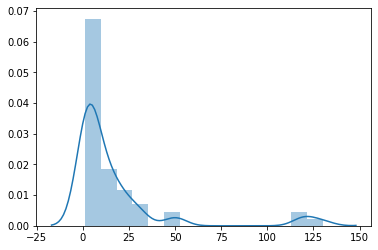

In [6]:
sns.distplot(df)

In [7]:
inp_array = df
print("input array:",inp_array)

input array:     Positive skewed
0                 1
1                 1
2                10
3                10
4                15
5                15
6                20
7                20
8                30
9                50
10              120
11              130
12              120
13               50
14               30
15               30
16               25
17               20
18               20
19               15
20               15
21               13
22               11
23                9
24                7
25                6
26                6
27                5
28                5
29                5
30                4
31                4
32                4
33                4
34                3
35                3
36                3
37                3
38                2
39                2
40                2
41                2
42                2
43                2
44                1
45                1
46                1
47                1
48     

In [8]:
out_array = np.log10(inp_array)
print("Output array:",out_array)

Output array:     Positive skewed
0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          1.176091
5          1.176091
6          1.301030
7          1.301030
8          1.477121
9          1.698970
10         2.079181
11         2.113943
12         2.079181
13         1.698970
14         1.477121
15         1.477121
16         1.397940
17         1.301030
18         1.301030
19         1.176091
20         1.176091
21         1.113943
22         1.041393
23         0.954243
24         0.845098
25         0.778151
26         0.778151
27         0.698970
28         0.698970
29         0.698970
30         0.602060
31         0.602060
32         0.602060
33         0.602060
34         0.477121
35         0.477121
36         0.477121
37         0.477121
38         0.301030
39         0.301030
40         0.301030
41         0.301030
42         0.301030
43         0.301030
44         0.000000
45         0.000000
46         0.000000
47         0.000000
48    

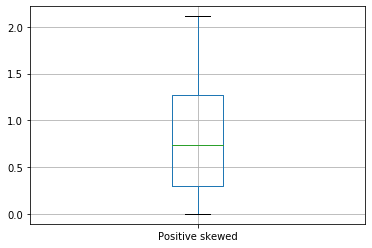

In [10]:
#boxplot showing No outliers with all of them treated by doing log10 transformations.
out_array.boxplot(column='Positive skewed')
plt.show()

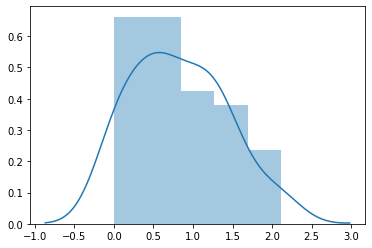

In [11]:
#right skewed data transferred to fairly or close to Normal distribution using log10 transformations
sns.distplot(out_array)

In [12]:
#if wants to revert back log10 values for  interpretation purpose than just raise 10 to the powers of log10 values as shown below
original_val=(10**out_array)
print("Original values:",original_val)

Original values:     Positive skewed
0               1.0
1               1.0
2              10.0
3              10.0
4              15.0
5              15.0
6              20.0
7              20.0
8              30.0
9              50.0
10            120.0
11            130.0
12            120.0
13             50.0
14             30.0
15             30.0
16             25.0
17             20.0
18             20.0
19             15.0
20             15.0
21             13.0
22             11.0
23              9.0
24              7.0
25              6.0
26              6.0
27              5.0
28              5.0
29              5.0
30              4.0
31              4.0
32              4.0
33              4.0
34              3.0
35              3.0
36              3.0
37              3.0
38              2.0
39              2.0
40              2.0
41              2.0
42              2.0
43              2.0
44              1.0
45              1.0
46              1.0
47              1.0
48 

# B) Square Root Transformation for Positive Or Right Skewed Data


In [13]:
data=[0,0,1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,2,1,1,1,1,1,1,0,0]
df2=pd.DataFrame(data,columns=['Positive skewed'])
df2

,Positive skewed
0,0
1,0
2,1
3,1
4,10
5,10
6,15
7,15
8,20
9,20


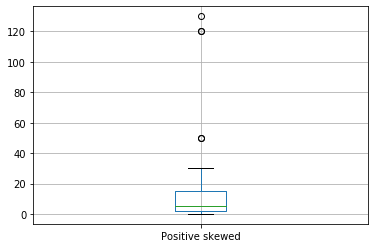

In [15]:
#boxplot showing three outliers
df2.boxplot(column='Positive skewed')
plt.show()

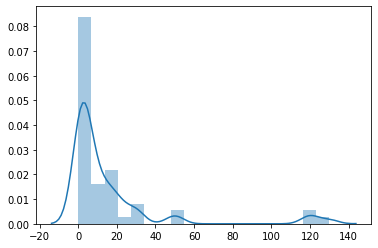

In [16]:
#right skewed data
sns.distplot(df2)

In [17]:
inp_array2 = df2
print("input array: ",inp_array2)

input array:      Positive skewed
0                 0
1                 0
2                 1
3                 1
4                10
5                10
6                15
7                15
8                20
9                20
10               30
11               50
12              120
13              130
14              120
15               50
16               30
17               30
18               25
19               20
20               20
21               15
22               15
23               13
24               11
25                9
26                7
27                6
28                6
29                5
30                5
31                5
32                4
33                4
34                4
35                4
36                3
37                3
38                3
39                3
40                2
41                2
42                2
43                2
44                2
45                2
46                1
47                1
48    

In [18]:
out_array2 = np.sqrt(inp_array2)
print("output array:",out_array2)

output array:     Positive skewed
0          0.000000
1          0.000000
2          1.000000
3          1.000000
4          3.162278
5          3.162278
6          3.872983
7          3.872983
8          4.472136
9          4.472136
10         5.477226
11         7.071068
12        10.954451
13        11.401754
14        10.954451
15         7.071068
16         5.477226
17         5.477226
18         5.000000
19         4.472136
20         4.472136
21         3.872983
22         3.872983
23         3.605551
24         3.316625
25         3.000000
26         2.645751
27         2.449490
28         2.449490
29         2.236068
30         2.236068
31         2.236068
32         2.000000
33         2.000000
34         2.000000
35         2.000000
36         1.732051
37         1.732051
38         1.732051
39         1.732051
40         1.414214
41         1.414214
42         1.414214
43         1.414214
44         1.414214
45         1.414214
46         1.000000
47         1.000000
48    

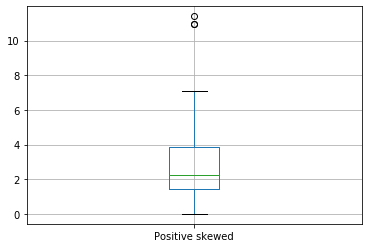

In [19]:
out_array2.boxplot(column='Positive skewed')
plt.show()

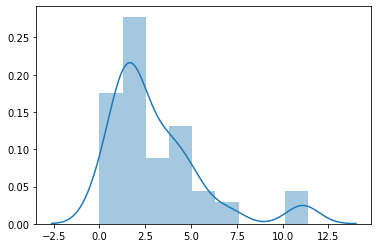

In [20]:
sns.distplot(out_array2)

# Square Transformation for left or negative skewed  data

In [52]:
data=[0,1,2,2,2,3,4,4,5,6,6,7,9,11,15,15,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20]
df3=pd.DataFrame(data,columns=['Negative Skewed'])
df3

,Negative Skewed
0,0
1,1
2,2
3,2
4,2
5,3
6,4
7,4
8,5
9,6


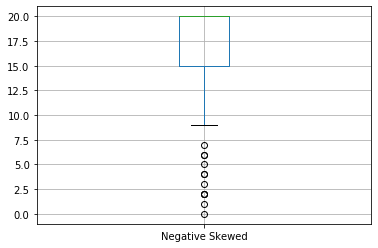

In [53]:
df3.boxplot(column='Negative Skewed')
plt.show()

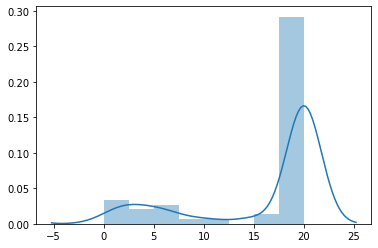

In [54]:
sns.distplot(df3)

In [55]:
inp_array3 = df3
print("input array: ",inp_array3)

input array:      Negative Skewed
0                 0
1                 1
2                 2
3                 2
4                 2
5                 3
6                 4
7                 4
8                 5
9                 6
10                6
11                7
12                9
13               11
14               15
15               15
16               20
17               20
18               20
19               20
20               20
21               20
22               20
23               20
24               20
25               20
26               20
27               20
28               20
29               20
30               20
31               20
32               20
33               20
34               20
35               20
36               20
37               20
38               20
39               20
40               20
41               20
42               20
43               20
44               20
45               20
46               20
47               20
48    

In [56]:
out_array3 = np.square(inp_array3)
print("output array:",out_array3)

output array:     Negative Skewed
0                 0
1                 1
2                 4
3                 4
4                 4
5                 9
6                16
7                16
8                25
9                36
10               36
11               49
12               81
13              121
14              225
15              225
16              400
17              400
18              400
19              400
20              400
21              400
22              400
23              400
24              400
25              400
26              400
27              400
28              400
29              400
30              400
31              400
32              400
33              400
34              400
35              400
36              400
37              400
38              400
39              400
40              400
41              400
42              400
43              400
44              400
45              400
46              400
47              400
48    

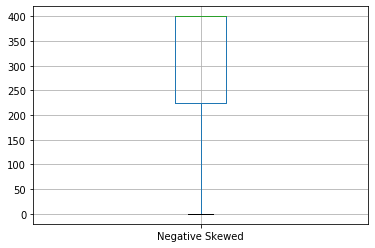

In [57]:
out_array3.boxplot(column='Negative Skewed')
plt.show()

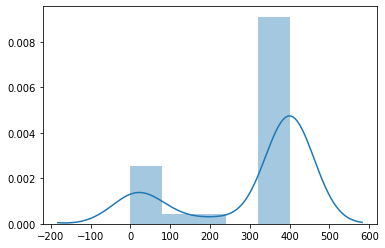

In [58]:
sns.distplot(out_array3)